ТЕСТ 1: Синтетические данные с разным уровнем шума
Iteration 0: Loss = 1.000000, w = 0.1999, b = 0.0000
Iteration 100: Loss = 0.001006, w = 0.9995, b = 0.0000
Iteration 200: Loss = 0.001006, w = 0.9995, b = 0.0000
Iteration 300: Loss = 0.001006, w = 0.9995, b = 0.0000
Iteration 400: Loss = 0.001006, w = 0.9995, b = 0.0000
Iteration 0: Loss = 1.000000, w = 0.1989, b = -0.0000
Iteration 100: Loss = 0.010985, w = 0.9945, b = 0.0000
Iteration 200: Loss = 0.010985, w = 0.9945, b = 0.0000
Iteration 300: Loss = 0.010985, w = 0.9945, b = 0.0000
Iteration 400: Loss = 0.010985, w = 0.9945, b = 0.0000
Iteration 0: Loss = 1.000000, w = 0.1971, b = 0.0000
Iteration 100: Loss = 0.028669, w = 0.9856, b = 0.0000
Iteration 200: Loss = 0.028669, w = 0.9856, b = 0.0000
Iteration 300: Loss = 0.028669, w = 0.9856, b = 0.0000
Iteration 400: Loss = 0.028669, w = 0.9856, b = 0.0000
Iteration 0: Loss = 1.000000, w = 0.1894, b = -0.0000
Iteration 100: Loss = 0.103373, w = 0.9469, b = -0.0000
Iteration 200: Loss

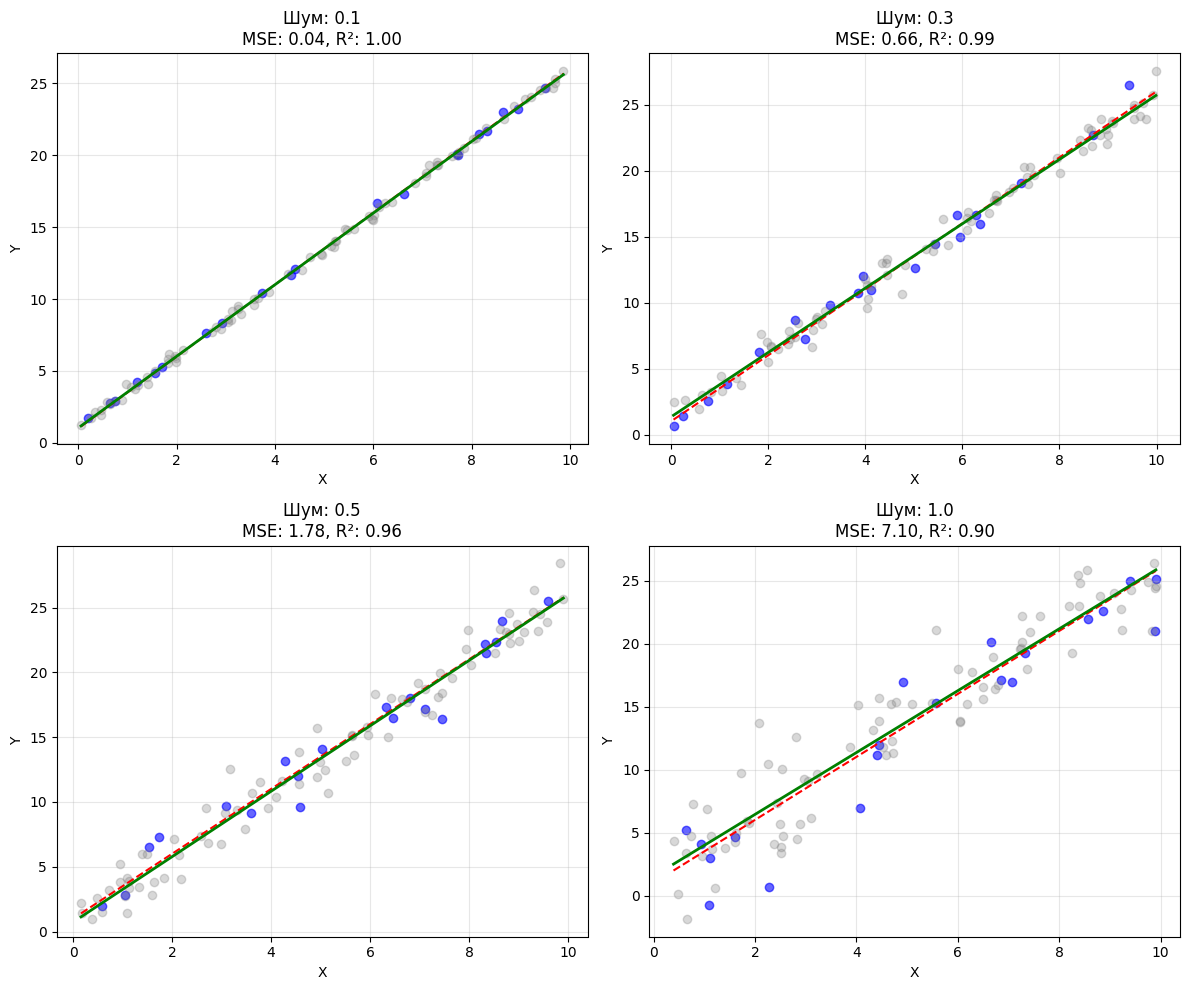


ТЕСТ 2: Исходные данные salary_data.csv
Файл salary_data.csv не найден.
Iteration 0: Loss = 1.000000, w = 0.1991, b = -0.0000
Iteration 100: Loss = 0.009131, w = 0.9954, b = 0.0000
Iteration 200: Loss = 0.009131, w = 0.9954, b = 0.0000
Iteration 300: Loss = 0.009131, w = 0.9954, b = 0.0000
Iteration 400: Loss = 0.009131, w = 0.9954, b = 0.0000
Iteration 500: Loss = 0.009131, w = 0.9954, b = 0.0000
Iteration 600: Loss = 0.009131, w = 0.9954, b = 0.0000
Iteration 700: Loss = 0.009131, w = 0.9954, b = 0.0000
Iteration 800: Loss = 0.009131, w = 0.9954, b = 0.0000
Iteration 900: Loss = 0.009131, w = 0.9954, b = 0.0000


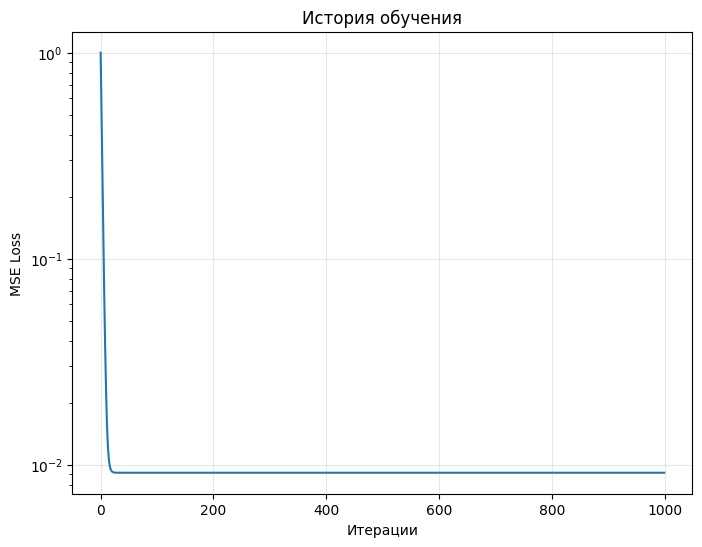


ПРОВЕРКА ЗАВЕРШЕНА


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegression():
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = 0
        self.b = 0
        self.loss_history = []

    def fit(self, X, Y):
        X = np.array(X).reshape(-1)
        Y = np.array(Y).reshape(-1)
        n = len(X)

        self.w = 0
        self.b = 0
        self.loss_history = []

        for i in range(self.iterations):
            Y_pred = self.w * X + self.b
            loss = np.mean((Y - Y_pred) ** 2)
            self.loss_history.append(loss)

            dw = (-2 / n) * np.sum(X * (Y - Y_pred))
            db = (-2 / n) * np.sum(Y - Y_pred)

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {loss:.6f}, w = {self.w:.4f}, b = {self.b:.4f}")

    def predict(self, X):
        X = np.array(X).reshape(-1)
        return self.w * X + self.b

def create_test_data(n_samples=100, noise_level=0.2, random_seed=42):
    np.random.seed(random_seed)

    true_w = 2.5
    true_b = 1.0

    X = np.random.uniform(0, 10, n_samples)
    noise = np.random.normal(0, noise_level * true_w, n_samples)
    Y = true_w * X + true_b + noise

    return X, Y, true_w, true_b

print("="*60)
print("ТЕСТ 1: Синтетические данные с разным уровнем шума")
print("="*60)

noise_levels = [0.1, 0.3, 0.5, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, noise_level in enumerate(noise_levels):
    X, Y, true_w, true_b = create_test_data(noise_level=noise_level, random_seed=42+idx)

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42
    )

    X_mean, X_std = X_train.mean(), X_train.std()
    Y_mean, Y_std = Y_train.mean(), Y_train.std()

    X_train_norm = (X_train - X_mean) / X_std
    Y_train_norm = (Y_train - Y_mean) / Y_std
    X_test_norm = (X_test - X_mean) / X_std

    model = LinearRegression(iterations=500, learning_rate=0.1)
    model.fit(X_train_norm, Y_train_norm)

    Y_pred_norm = model.predict(X_test_norm)
    Y_pred = Y_pred_norm * Y_std + Y_mean

    w_original = model.w * (Y_std / X_std)
    b_original = Y_mean - w_original * X_mean + model.b * Y_std

    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    ax = axes[idx]
    ax.scatter(X_test, Y_test, alpha=0.6, color='blue')
    ax.scatter(X_train, Y_train, alpha=0.3, color='gray')

    x_range = np.linspace(X.min(), X.max(), 100)
    true_line = true_w * x_range + true_b
    ax.plot(x_range, true_line, 'r--')

    pred_line = w_original * x_range + b_original
    ax.plot(x_range, pred_line, 'g-', linewidth=2)

    ax.set_title(f'Шум: {noise_level}\nMSE: {mse:.2f}, R²: {r2:.2f}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ТЕСТ 2: Исходные данные salary_data.csv")
print("="*60)

try:
    df = pd.read_csv("salary_data.csv", header=None)
    df = df[~df[0].str.contains("[A-Za-z]", regex=True)]
    df = df[0].str.split(",", expand=True)
    df.columns = ["YearsExperience", "Salary"]
    df = df.astype(float)

    X = df.YearsExperience.values
    Y = df.Salary.values

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=1/3, random_state=0
    )

    X_mean, X_std = X_train.mean(), X_train.std()
    Y_mean, Y_std = Y_train.mean(), Y_train.std()

    X_train_norm = (X_train - X_mean) / X_std
    Y_train_norm = (Y_train - Y_mean) / Y_std
    X_test_norm = (X_test - X_mean) / X_std

    model = LinearRegression(iterations=1000, learning_rate=0.01)
    model.fit(X_train_norm, Y_train_norm)

    Y_pred_norm = model.predict(X_test_norm)
    Y_pred = Y_pred_norm * Y_std + Y_mean

    w_original = model.w * (Y_std / X_std)
    b_original = Y_mean - w_original * X_mean + model.b * Y_std

    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    print(f"Найденные параметры модели:")
    print(f"  Коэффициент (w): {w_original:.2f}")
    print(f"  Смещение (b): {b_original:.2f}")
    print(f"\nМетрики на тестовых данных:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {np.sqrt(mse):.2f}")
    print(f"  R² Score: {r2:.4f}")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X_test, Y_test, color='blue', alpha=0.6)
    plt.scatter(X_train, Y_train, color='gray', alpha=0.4)

    x_range = np.linspace(X.min(), X.max(), 100)
    y_range = w_original * x_range + b_original
    plt.plot(x_range, y_range, color='red', linewidth=2)

    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.title(f'Линейная регрессия\nMSE: {mse:.2f}, R²: {r2:.4f}')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(model.loss_history)
    plt.xlabel('Итерации')
    plt.ylabel('MSE Loss')
    plt.title('История обучения')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')

    plt.tight_layout()
    plt.show()

    print("\n" + "="*60)
    print("ТЕСТ 3: Анализ остатков")
    print("="*60)

    residuals = Y_test - Y_pred

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.scatter(Y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.title('Остатки vs Предсказания')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    plt.hist(residuals, bins=15, edgecolor='black', alpha=0.7)
    plt.xlabel('Остатки')
    plt.ylabel('Частота')
    plt.title('Распределение остатков')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q plot остатков')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Статистика остатков:")
    print(f"  Среднее остатков: {residuals.mean():.2f}")
    print(f"  Стандартное отклонение остатков: {residuals.std():.2f}")
    print(f"  Min остаток: {residuals.min():.2f}")
    print(f"  Max остаток: {residuals.max():.2f}")

except FileNotFoundError:
    print("Файл salary_data.csv не найден.")

    X, Y, _, _ = create_test_data(noise_level=0.3)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    X_mean, X_std = X_train.mean(), X_train.std()
    Y_mean, Y_std = Y_train.mean(), Y_train.std()

    X_train_norm = (X_train - X_mean) / X_std
    Y_train_norm = (Y_train - Y_mean) / Y_std

    model = LinearRegression(iterations=1000, learning_rate=0.1)
    model.fit(X_train_norm, Y_train_norm)

    plt.figure(figsize=(8, 6))
    plt.plot(model.loss_history)
    plt.xlabel('Итерации')
    plt.ylabel('MSE Loss')
    plt.title('История обучения')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    plt.show()

print("\n" + "="*60)
print("ПРОВЕРКА ЗАВЕРШЕНА")
print("="*60)